# TfidfVectorizer

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import lightgbm as lgb


pd.set_option('display.max_colwidth', None)

train_stop = pd.read_csv('../../Data-Preparation/traindata_with_stopwords_preprocessed.csv')
test_stop = pd.read_csv('../../Data-Preparation/testdata_with_stopwords_preprocessed.csv')
train_no_stop = pd.read_csv('../../Data-Preparation/traindata_without_stopwords_preprocessed.csv')
test_no_stop = pd.read_csv('../../Data-Preparation/testdata_without_stopwords_preprocessed.csv')



# df['Text'] = df['Text'].str.lower()

## ohne Stopwords

In [3]:
train_no_stop['Text'].astype(str)

0                        Rise shining lol mins later planned rush door time
1                                     2nd interview today looking promising
2                                                                 feel pain
3          4yr old son went exploring amp hiking today found Luv amphibians
4                                                lonely housemates gone pub
                                         ...                               
1279995                               held together bubblegum amp blessings
1279996                                                          Heehee one
1279997                                 welcome change mind though let know
1279998                                                    BET Bring Backup
1279999                    Windows Linux box Installing BSD Apple iPod Yeah
Name: Text, Length: 1280000, dtype: object

In [4]:
vectorizer = TfidfVectorizer()
# astype(str) is necesarry 
X = vectorizer.fit_transform(train_no_stop['Text'].astype(str))
y = train_no_stop['target']

X_test = vectorizer.transform(test_no_stop['Text'].astype(str))
y_test = test_no_stop['target']

In [6]:
test_no_stop['Text']


0               would like even little bit time work Laying 11 30 work 12 30 8 30
1                     Looking forward keeping touch Naomi long time since chatted
2                        Germany NBA airtime got International LP watch game sure
3         future trouble favourite Bagley probably Running Blind Iceland Terrific
4                     know reason Opera popular mobile platform Firefox rocks ass
                                           ...                                   
319995                                                                        NaN
319996                                                         idea wear tomorrow
319997                                             darn think journey like really
319998              oh Calvin Harris called DAFT BASTARD feel cool new claim fame
319999                                        Go family meal 1 hour cheer grandpa
Name: Text, Length: 320000, dtype: object

In [5]:
X_test

<320000x244612 sparse matrix of type '<class 'numpy.float64'>'
	with 2115355 stored elements in Compressed Sparse Row format>

### ohne Hyperparameter

In [4]:
model = lgb.LGBMClassifier()

In [5]:
model.fit(X, y)

[LightGBM] [Info] Number of positive: 640000, number of negative: 640000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 31.631473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 324517
[LightGBM] [Info] Number of data points in the train set: 1280000, number of used features: 22789
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [6]:
y_pred_lgbm = model.predict(X_test)

<Axes: >

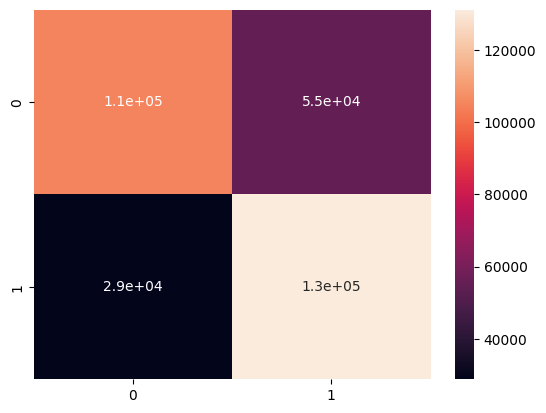

In [7]:
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)

sns.heatmap(cm_lgbm, annot=True)

In [8]:
print(f'Accuracy: {accuracy_score(y_test, y_pred_lgbm):.2f}')

Accuracy: 0.74


### mit Hyperparameter

In [9]:
model = lgb.LGBMClassifier(
    num_leaves=300,
)

In [10]:
model.fit(X, y)

[LightGBM] [Info] Number of positive: 640000, number of negative: 640000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 103.814619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 324517
[LightGBM] [Info] Number of data points in the train set: 1280000, number of used features: 22789
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(num_leaves=300)

Accuracy: 0.77


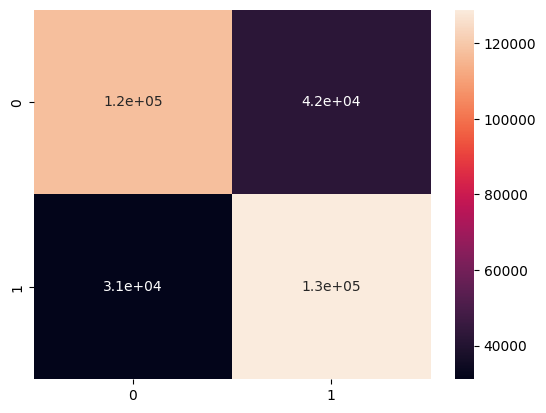

In [11]:
y_pred_lgbm = model.predict(X_test)
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)

sns.heatmap(cm_lgbm, annot=True)
print(f'Accuracy: {accuracy_score(y_test, y_pred_lgbm):.2f}')

## mit Stopwords

In [12]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_stop['Text'].astype(str))
y = train_stop['target']

X_test = vectorizer.transform(test_stop['Text'].astype(str))
y_test = test_stop['target']

### ohne Hyperparameter

In [13]:
model = lgb.LGBMClassifier()

In [14]:
model.fit(X, y)

[LightGBM] [Info] Number of positive: 640000, number of negative: 640000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 54.778851 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 374030
[LightGBM] [Info] Number of data points in the train set: 1280000, number of used features: 27629
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [15]:
y_pred_lgbm = model.predict(X_test)


Accuracy: 0.76


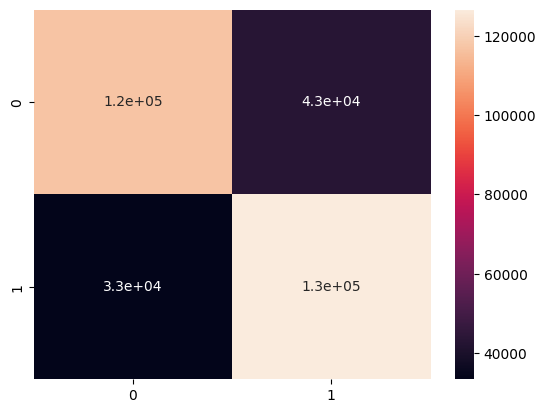

In [16]:
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)

sns.heatmap(cm_lgbm, annot=True)

print()
print(f'Accuracy: {accuracy_score(y_test, y_pred_lgbm):.2f}')

### mit Hyperparameter

In [17]:
#accuracy is 0.78
#ca. 2min model.fit

# model = lgb.LGBMClassifier(
#     num_leaves=100,
#     objective='binary',
#     tree_learner='feature',
# )

In [18]:
#accuracy is 0.78
#ca. 2min 40s model.fit

# model = lgb.LGBMClassifier(
#     num_leaves=100,
#     max_bin=512,
#     learning_rate=0.05,
#     num_iterations=200,
# )

In [19]:
#acuracy is 0.75   
#ca. 11min 16s model.fit

# model = lgb.LGBMClassifier(
#     num_leaves=200,
#     max_bin=512,
#     learning_rate=0.02,
#     num_iterations=300,
#     boosting_type='dart',
# )

In [20]:
# nur noch 0.71 accuracy
#ca. 20min model.fit

# model = lgb.LGBMClassifier(
#     # num_leaves=200,
#     max_bin=512,
#     learning_rate=0.02,
#     num_iterations=300,
#     boosting_type='dart',
# )

In [21]:
# nur noch 0.74 accuracy
#ca. 2min 14 model.fit

# model = lgb.LGBMClassifier(
#     boosting_type='dart',
# )

In [22]:
# auch 0.78
#ca. 2min 19 model.fit

# model = lgb.LGBMClassifier(
#     num_leaves=100,
# )

In [23]:
# accuracy 0.79
#ca. 2min 47 model.fit

# model = lgb.LGBMClassifier(
#     num_leaves=200,
# )

In [24]:
# only 0.74
# model = lgb.LGBMClassifier(
#     boosting = 'dart',
# )

In [25]:
# accuracy 0.76
# model = lgb.LGBMClassifier(
#     max_bin=2048,
# )

In [26]:
# accuracy 0.72
# model = lgb.LGBMClassifier(
#     learning_rate=0.05, boosting_type= 'gbdt',
#     objective='binary',
#     metric = ['auc', 'binary_logloss'],
#     num_leaves=100, max_depth=10,
# )
     

In [27]:
# accuracy 0.80
# ca. 4min 37 model.fit

# größere num_leaves bringt bessere nichts mehr

model = lgb.LGBMClassifier(
    num_leaves=300,
)

In [29]:
model.fit(X, y)

[LightGBM] [Info] Number of positive: 640000, number of negative: 640000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 63.045402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 374030
[LightGBM] [Info] Number of data points in the train set: 1280000, number of used features: 27629
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(num_leaves=300)

In [30]:
y_pred_lgbm = model.predict(X_test)

Accuracy: 0.80


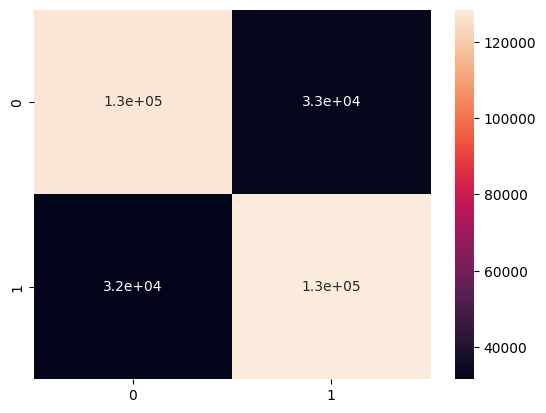

In [31]:
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)

sns.heatmap(cm_lgbm, annot=True)

print(f'Accuracy: {accuracy_score(y_test, y_pred_lgbm):.2f}')

# sentence-transformers

In [ ]:
import pandas as pd
import numpy as np


from sentence_transformers import SentenceTransformer, util
vectorizer2 = SentenceTransformer('all-mpnet-base-v2')

pd.set_option('display.max_colwidth', None)

train_stop = pd.read_csv('../../Data-Preperation/traindata_with_stopwords_preprocessed.csv')
test_stop = pd.read_csv('../../Data-Preperation/testdata_with_stopwords_preprocessed.csv')
train_no_stop = pd.read_csv('../../Data-Preperation/traindata_without_stopwords_preprocessed.csv')
test_no_stop = pd.read_csv('../../Data-Preperation/testdata_without_stopwords_preprocessed.csv')


/Users/I569423/Library/CloudStorage/OneDrive-Personal/DHBW/4.Semester/DataExploration/Data-Exploration/venv/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
/Users/I569423/Library/CloudStorage/OneDrive-Personal/DHBW/4.Semester/DataExploration/Data-Exploration/venv/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
import lightgbm as lgb

In [ ]:
X = train_stop['Text'].astype(str)

## mit Stopwords

In [ ]:
# je 5000 werte des Targets werden gespalten
df_0 = train_stop[train_stop['target'] == 0]
df_4 = train_stop[train_stop['target'] == 4]

df_cut0 = df_0.iloc[:500]
df_cut4 = df_4.iloc[:500]

result = pd.concat([df_cut0, df_cut4])


dft_0 = test_stop[test_stop['target'] == 0]
dft_4 = test_stop[test_stop['target'] == 4]

dft_cut0 = dft_0.iloc[:500]
dft_cut4 = dft_4.iloc[:500]

test = pd.concat([dft_cut0, dft_cut4])

In [ ]:
text = result['Text'].values.tolist()

In [ ]:
vectors = [vectorizer2.encode(sentence) for sentence in text]

In [ ]:
X = np.array(vectors)
y = result['target']

In [ ]:
model = lgb.LGBMClassifier()

In [ ]:
model.fit(X, y)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
text = result['Text'].values.tolist()
vectors = [vectorizer2.encode(sentence) for sentence in text]
X_test = np.array(vectors)

In [ ]:
y_pred_lgbm = model.predict(X_test)

In [ ]:
embeddings = np.array(vectors)

NameError: name 'vectors' is not defined

In [ ]:
embeddings.shape

NameError: name 'embeddings' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
embeddings_findings = np.array(embeddings_findings)